# CENSUS INCOME

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('census.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.shape

(32560, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
# There is no null values present in data.

In [10]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [12]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [13]:
df['Education_num'].nunique()

16

In [14]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [17]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [18]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
# As we can see in column 'Workclass','Occupation' and 'Country' has some '?' value. These are nan values.

In [20]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [21]:
# Replacing '?' with nan values.
df=df.replace(' ?',np.NaN)

In [22]:
# We should also check whether there is duplicates or some other nan type data or not.

In [23]:
df.isin([' ','NA','-']).sum().any()

False

In [24]:
df.duplicated().sum()

24

In [25]:
# Yes there are 24 duplicates.
# lets drop them

In [27]:
df.drop_duplicates(keep='first',inplace=True)

In [28]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
fill_nan=['Workclass','Occupation','Native_country']
for i in fill_nan:
    df[i]=df[i].fillna(df[i].mode()[0])

In [30]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [31]:
df.shape

(32536, 15)

In [32]:
categorical=[]
numerical=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

In [33]:
print('categorical :',categorical)
print('numerical:',numerical)

categorical : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
numerical: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [34]:
# Statistical analysis

In [36]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


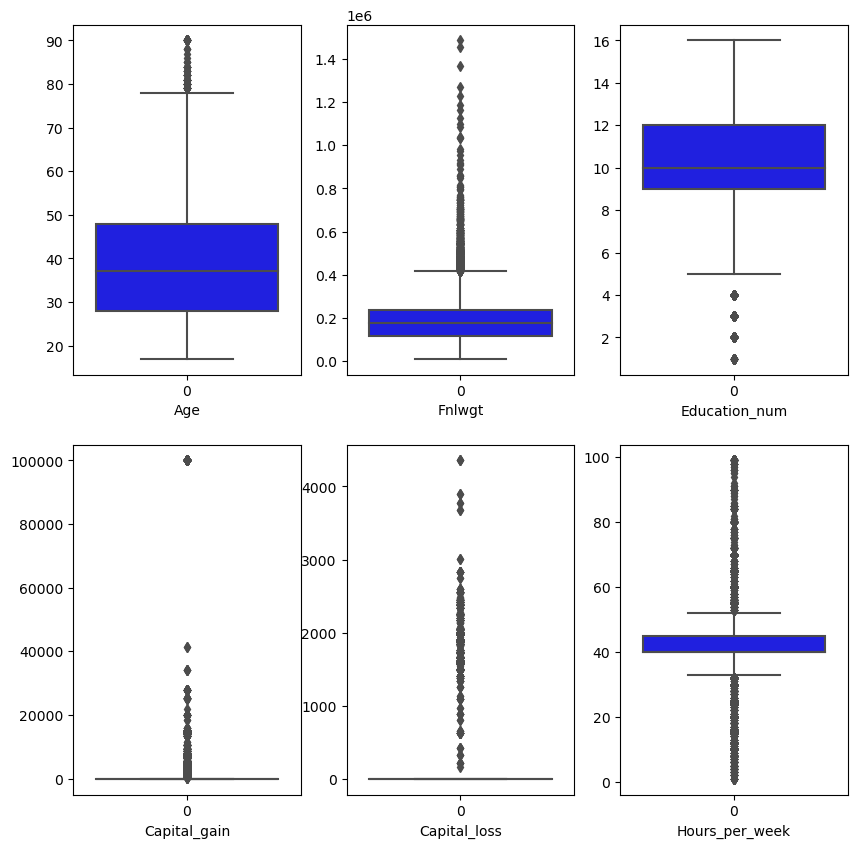

In [37]:
plt.figure(figsize=(10,10))
plot=1
for i in numerical:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i)
    plot+=1
plt.show()

In [38]:
# As we can see outliers are present in numerical columns.
# fnlwgt has larger scale than others.

# Visualization

<Axes: ylabel='Income'>

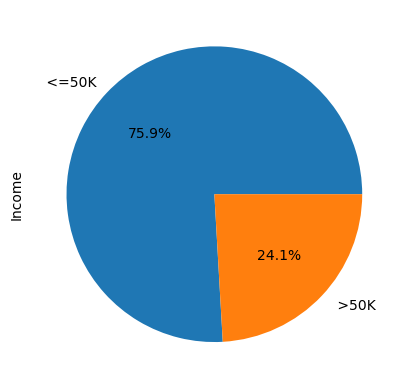

In [39]:
df['Income'].value_counts().plot.pie(autopct='%3.1f%%')

In [40]:
# In our target column 'Income' data is imbalanced as people recieving salary more than 50k are 75.9% .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),
  Text(31, 0, '48'),
  Te

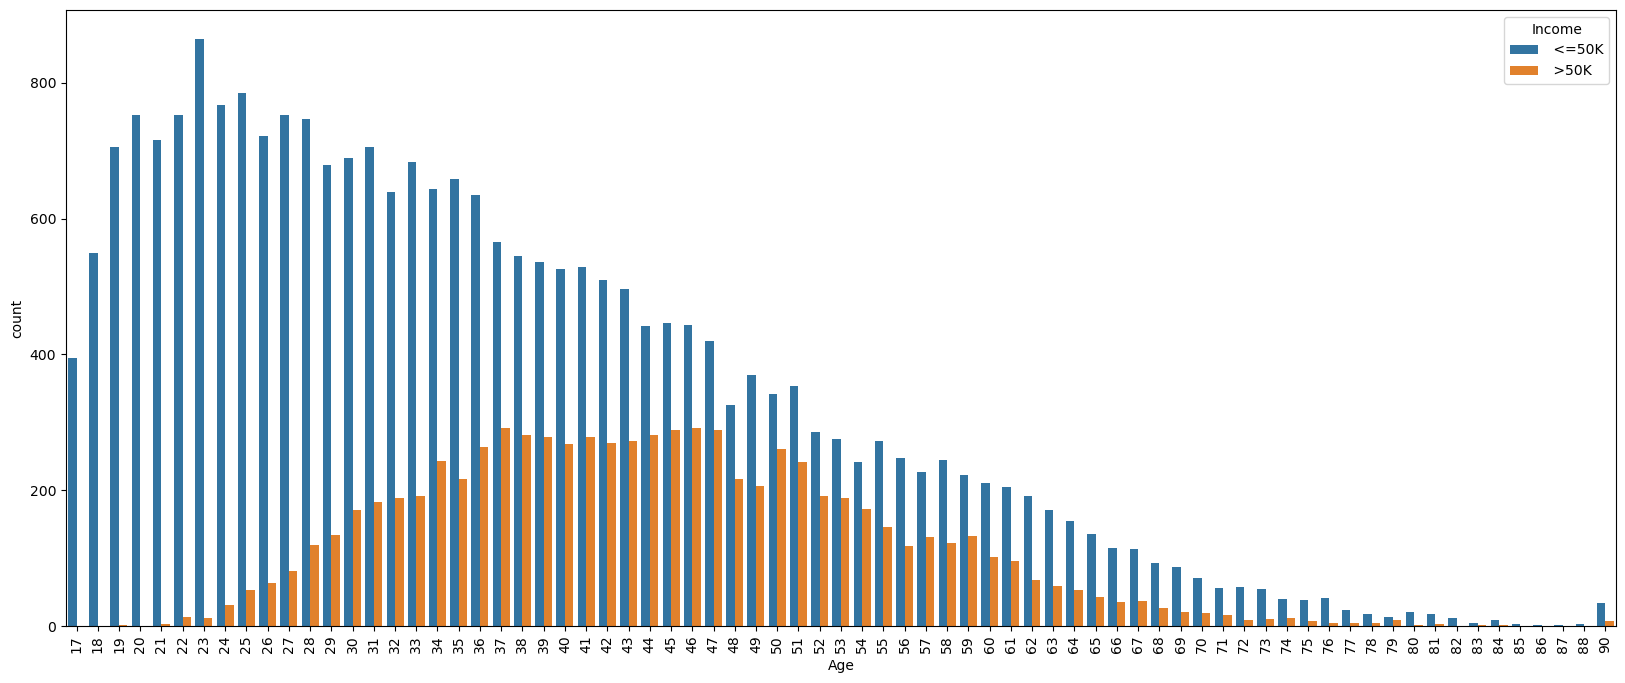

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [42]:
# Majority of people of age between 20-35 recieve salary less than 50k. People of age between 35-52 mostly recieve salary 
# more than 50k.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

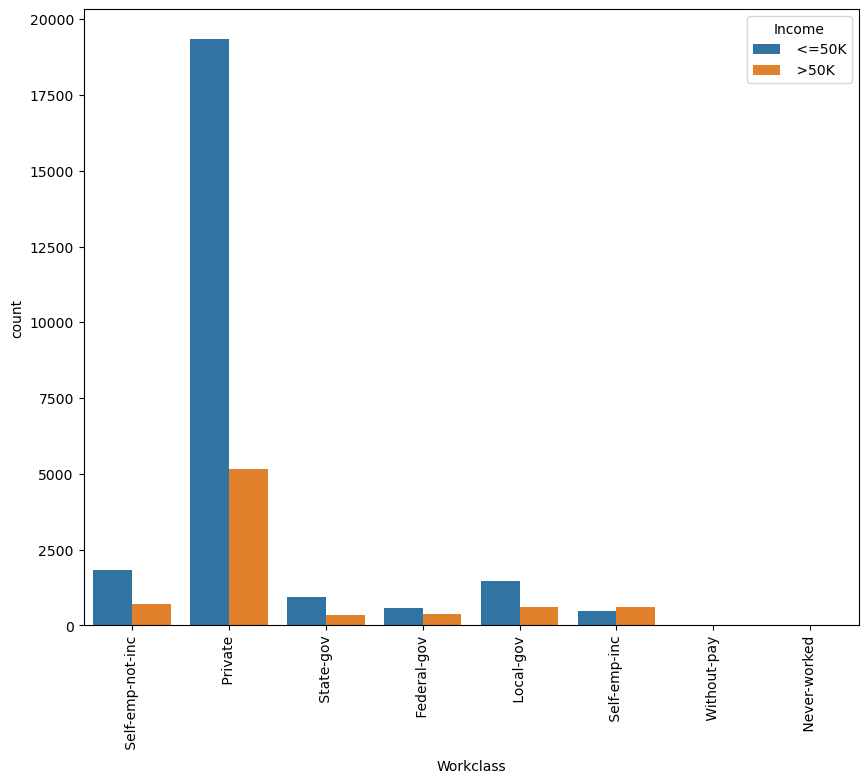

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Workclass'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [44]:
# People in private sector are mostly working peple than other fields. In every sector people who are recieving salary
# more than 50k are less than others but self emp-inc more people recieve money more than 50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

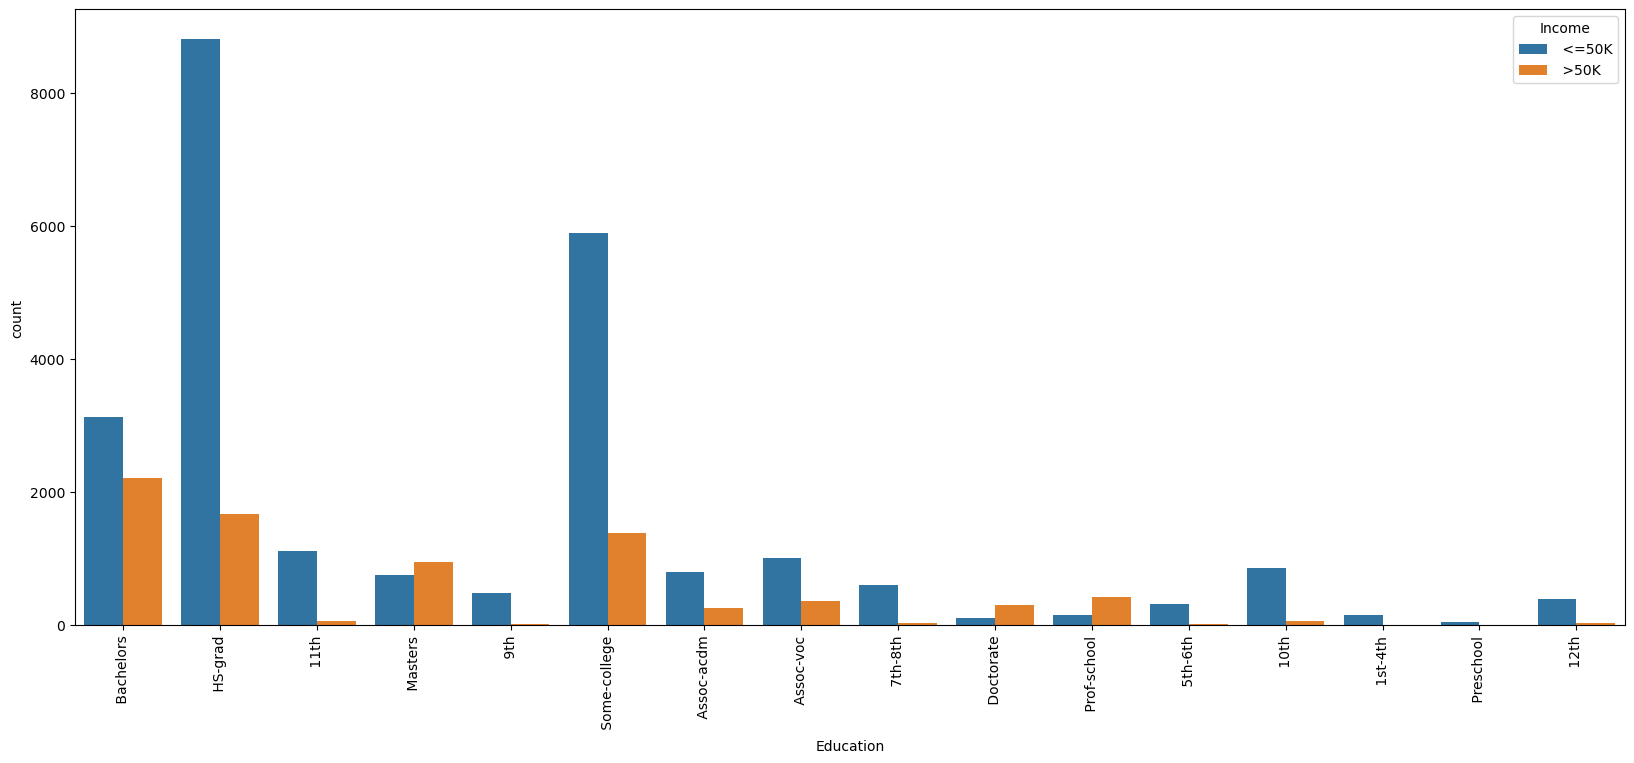

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Education'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [47]:
# HS-grad and some-colleges are education of mostly working people. Doctorate and prof-school people recieving more than 
# 50k.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

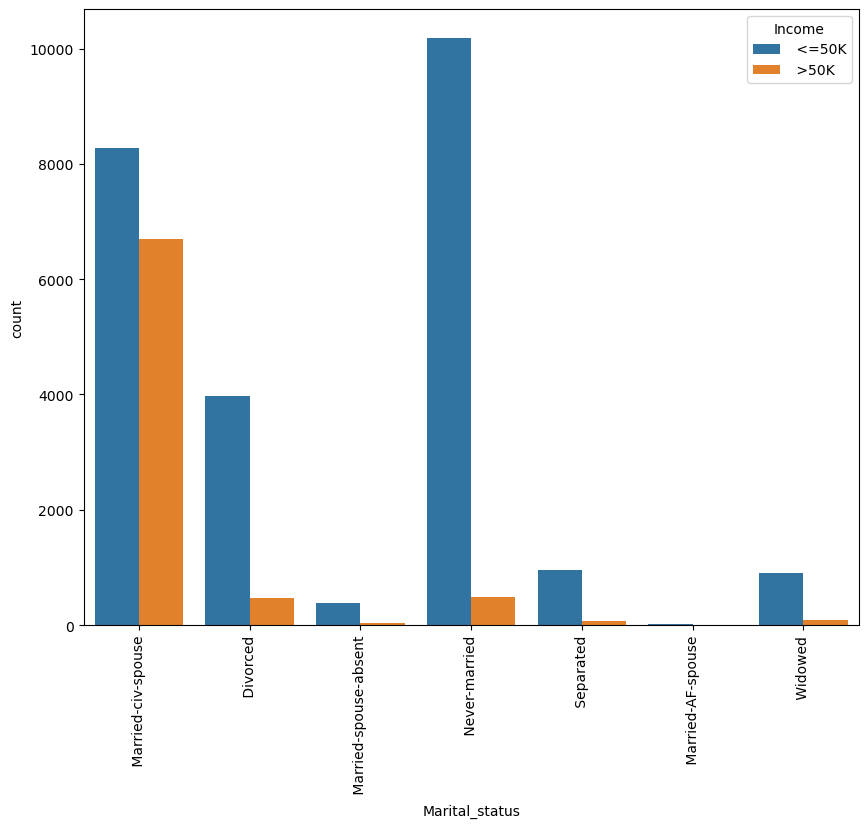

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Marital_status'],hue=df['Income'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Marital_status'>

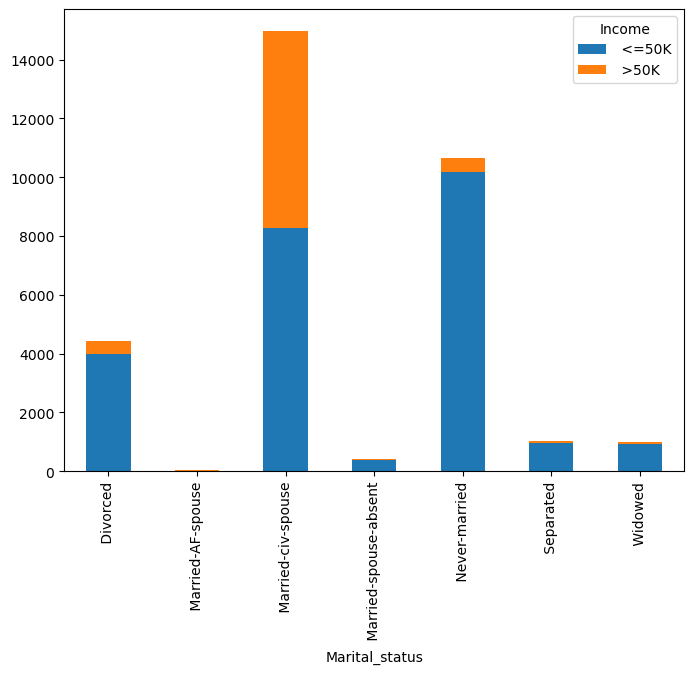

In [50]:
table = pd.crosstab(df['Marital_status'], df['Income'])
table.plot(kind='bar',stacked=True,figsize=(8,6))

In [51]:
# Married-civ-spouse are more likely working people but in data we have majority of working people who are never married.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

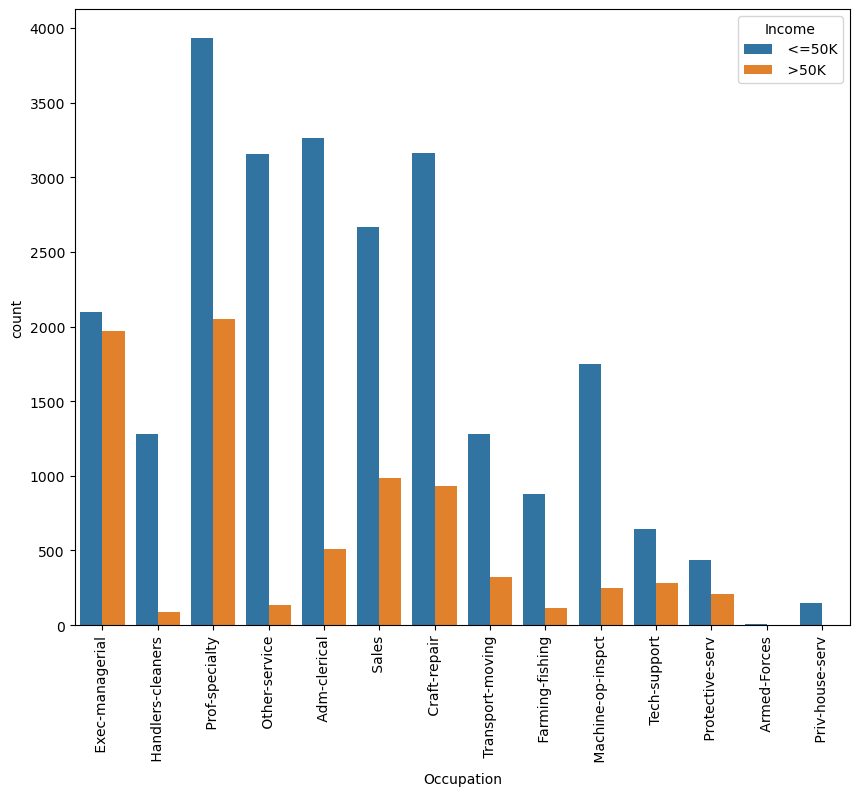

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Occupation'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [53]:
# Exec-managerial and prof-speciality have income of more than 50k. Peoples working in Arm- Forces, Farming-fishing,
# Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

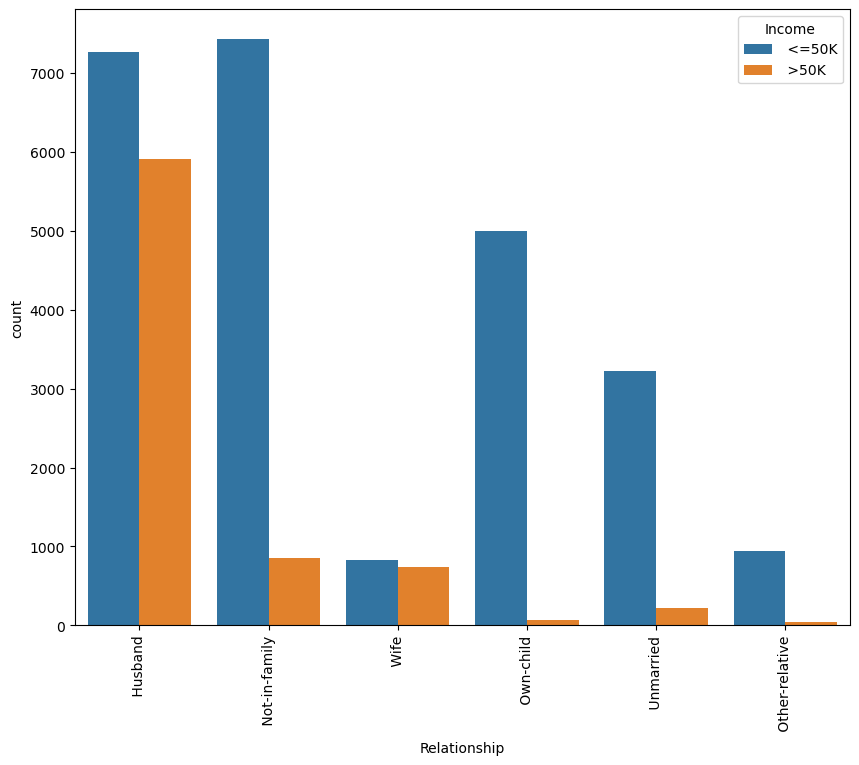

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Relationship'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [55]:
# Unmarried people earning more than 50K dollars an year.Wives are equally likely to earn more than 50K dollars an year.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

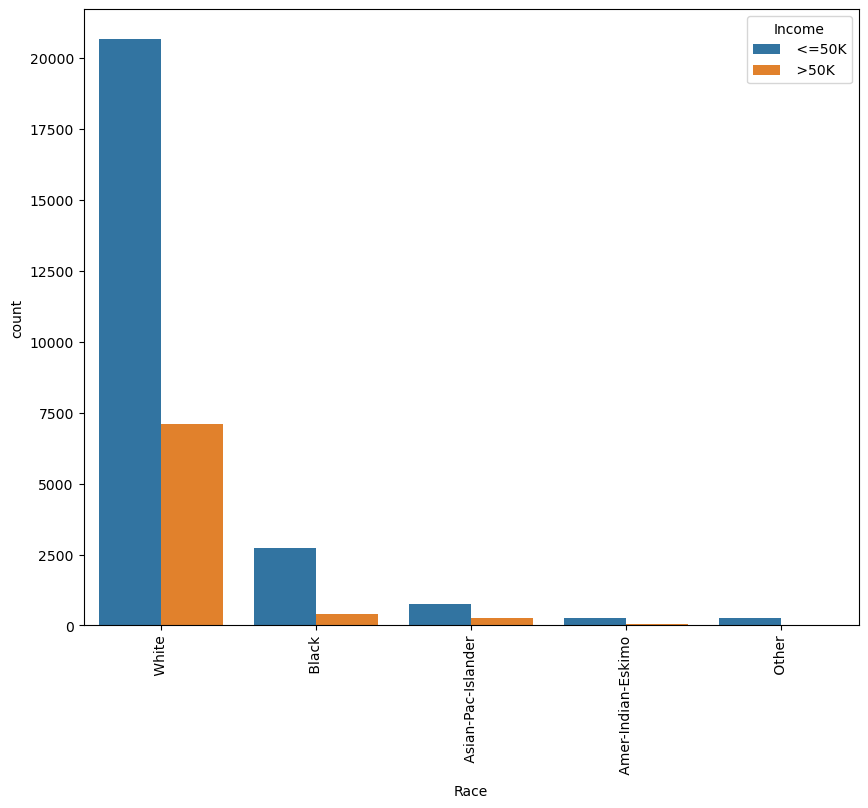

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Race'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [57]:
# Maximum white people earn more than and less than 50k.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

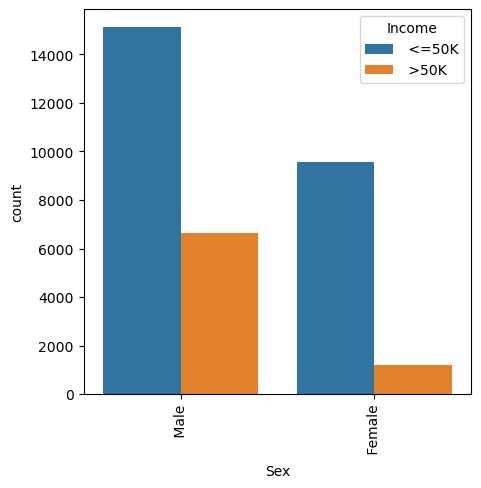

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Sex'],hue=df['Income'])
plt.xticks(rotation='vertical')

In [59]:
# In 50k club men are more than female.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

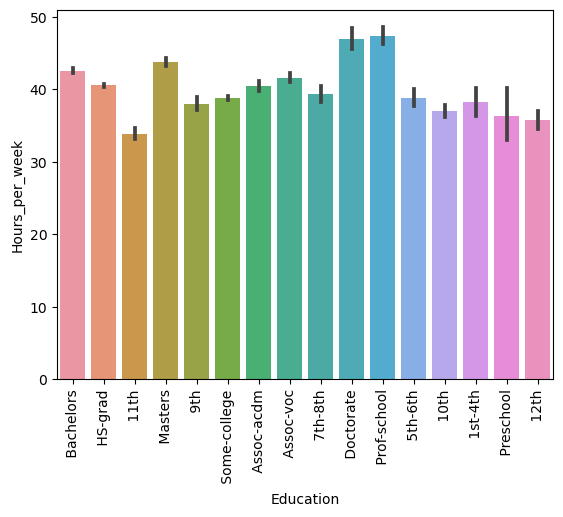

In [60]:
sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.xticks(rotation='vertical')

In [61]:
# Doctorate and prof-school work for more hours per week than others.

In [62]:
# Encoding
lb = LabelEncoder()
for i in categorical:
    df[i] = lb.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [63]:
# REmoving outliers
z = np.abs(zscore(df))
threshold = 3
DF = df[(z<3).all(axis = 1)]


In [64]:
print(df.shape)
print(DF.shape)

(32536, 15)
(27751, 15)


In [65]:
df=DF.copy()

<Axes: >

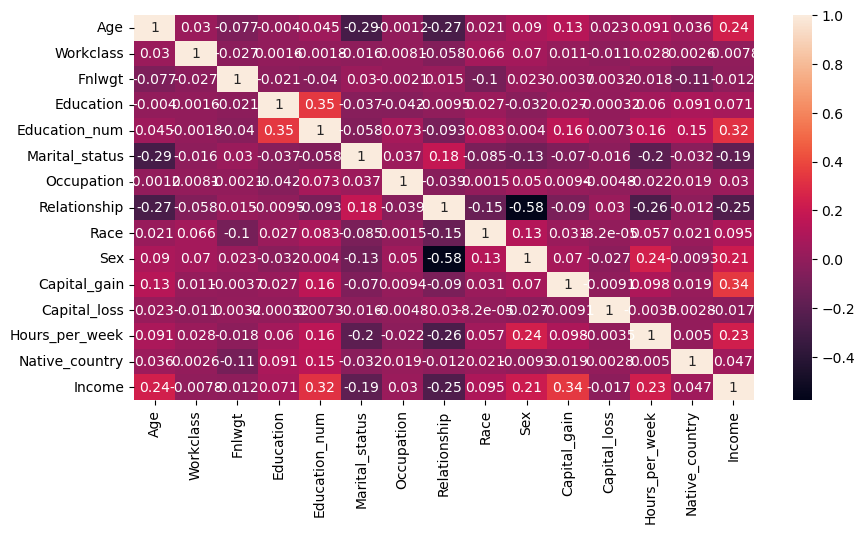

In [66]:
# Checking  correlation 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

<Axes: >

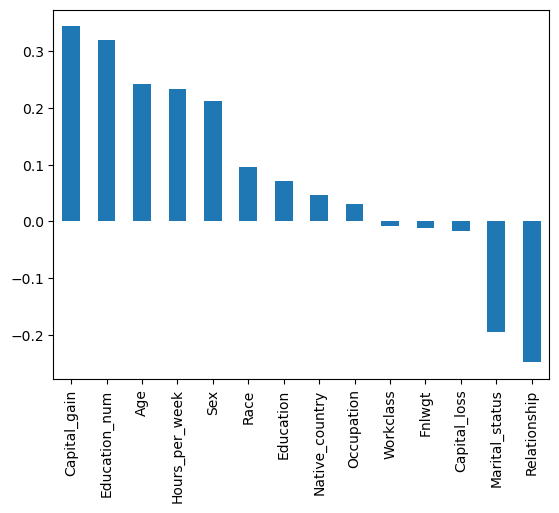

In [67]:
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar')

In [68]:
# Not much impact on target variable.

In [69]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.451414,Age
1,8.809700,Workclass
2,4.725712,Fnlwgt
3,9.312008,Education
4,24.037077,Education_num
5,4.372837,Marital_status
6,3.377197,Occupation
7,2.945858,Relationship
8,37.134945,Race
9,4.588603,Sex


In [70]:
# There are high multicolinearity between features. Not good to remove so much cloumns. We will do scaling and pca.

In [71]:
df.drop(['Fnlwgt'], axis=1, inplace=True)

In [72]:
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [73]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [74]:
Y.value_counts()

0    21527
1    21527
Name: Income, dtype: int64

In [75]:
sts= StandardScaler()
X_scale = sts.fit_transform(X)

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
xpca = pca.fit_transform(X_scale)

In [77]:
x=pd.DataFrame(xpca)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, random_state=42, test_size=.3)

In [80]:
# Checking best random state
max_accu=0
max_rs=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.3, random_state=i)
    lg=LogisticRegression()
    lg.fit(X_train,Y_train)
    y_pred=lg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>max_accu:
        max_accu=acc
        maxrs=i
print('Best accuracy:', max_accu ,'best Random_state:', maxrs)

Best accuracy: 0.780444375629016 best Random_state: 5


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, random_state=5, test_size=.3)
lg=LogisticRegression()
lg.fit(X_train,Y_train)
y_pred=lg.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print('\n')
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))

0.780444375629016


[[4939 1523]
 [1313 5142]]


              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6462
           1       0.77      0.80      0.78      6455

    accuracy                           0.78     12917
   macro avg       0.78      0.78      0.78     12917
weighted avg       0.78      0.78      0.78     12917



In [82]:
# Learning with other models
model=[ LogisticRegression(),SVC(),GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(),
       RandomForestClassifier(), ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print(m)
    print(accuracy_score(Y_test, y_pred))
    print('\n')
    print(confusion_matrix(Y_test, y_pred))
    print('\n')
    print(classification_report(Y_test, y_pred))

LogisticRegression()
0.780444375629016


[[4939 1523]
 [1313 5142]]


              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6462
           1       0.77      0.80      0.78      6455

    accuracy                           0.78     12917
   macro avg       0.78      0.78      0.78     12917
weighted avg       0.78      0.78      0.78     12917

SVC()
0.8288302237361617


[[4882 1580]
 [ 631 5824]]


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      6462
           1       0.79      0.90      0.84      6455

    accuracy                           0.83     12917
   macro avg       0.84      0.83      0.83     12917
weighted avg       0.84      0.83      0.83     12917

GaussianNB()
0.7044979484400402


[[3991 2471]
 [1346 5109]]


              precision    recall  f1-score   support

           0       0.75      0.62      0.68      6462
           1       0.67      0.79      0.73     

# hyperparameter tuning

In [83]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],'max_depth' : [20,30,40],'n_estimators' : [100, 150, 200]}
           

In [84]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'n_estimators': [100, 150, 200]})

In [85]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}

In [87]:
Final_model = RandomForestClassifier(criterion='entropy',n_estimators= 200, max_depth=30 )
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.8610358442362778


In [88]:
import joblib
joblib.dump(Final_model,'Census_Income.obj')

['Census_Income.obj']